In [170]:
from nltk.corpus import stopwords
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [142]:
df = pd.read_csv(r"/content/cuisine_data.csv")
df.head()

,cuisine_description,cuisine
0,romaine lettuce black olives grape tomatoes ga...,greek
1,plain flour ground pepper salt tomatoes ground...,southern_us
2,eggs pepper salt mayonaise cooking oil green c...,filipino
3,water vegetable oil wheat salt,indian
4,black pepper shallots cornflour cayenne pepper...,indian


In [143]:
df.shape

(39774, 2)

In [144]:
z=pd.DataFrame(df['cuisine'].value_counts())
z.columns=['frequency']
z['cuisine']=z.index
z.reset_index(drop=True,inplace=True)

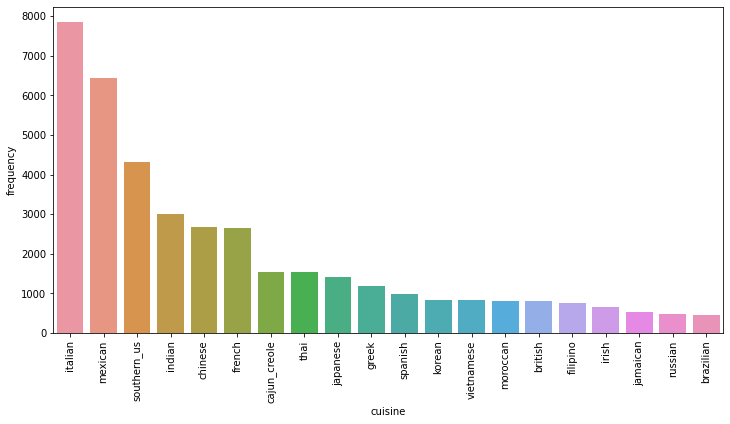

In [145]:
plt.figure(figsize=(12,6))
sns.barplot(data=z.reset_index(), x='cuisine', y='frequency')
plt.xticks(rotation=90)
plt.show()

# Checking for null variables

In [146]:
df.isnull().sum()

cuisine_description    0
cuisine                0
dtype: int64

In [147]:
df = df[~df['cuisine'].isna()]

In [148]:
df.shape

(39774, 2)

# Dropping the duplicate variables

In [149]:
df.drop_duplicates(inplace=True)

In [150]:
df.shape

(39677, 2)

# Preprocessignthe Text

In [151]:
print(df['cuisine_description'].apply(lambda x:len(x.split(' '))).sum())

806112


In [152]:
import string 
punctuation = string.punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [153]:
special_character_remover = re.compile('[/(){}\[\]\|@,;]')
extra_symbol_remover = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

In [154]:
def clean_text(text):
    text = text.lower()
    text = special_character_remover.sub(' ',text)
    text = extra_symbol_remover.sub('',text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text

df['cousine_description'] = df['cuisine_description'].apply(clean_text)

In [155]:
print(df['cousine_description'].apply(lambda x: len(x.split(' '))).sum())

803337


In [156]:
X = df.cousine_description
y = df.cuisine
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [157]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(27773,) (11904,) (27773,) (11904,)


## Applying Logistic Regression

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score

lr = Pipeline([('vect',CountVectorizer()),
               ('tfidf',TfidfTransformer()),
               ('clf',LogisticRegression())])

lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)    

print("Accuracy is : ",accuracy_score(y_pred1,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy is :  0.7819220430107527


In [159]:
from sklearn.naive_bayes import MultinomialNB

naivebayes = Pipeline([('vect',CountVectorizer()),
               ('tfidf',TfidfTransformer()),
               ('clf',MultinomialNB())])

naivebayes.fit(X_train,y_train)
y_pred = naivebayes.predict(X_test)    

print("Accuracy is : ",accuracy_score(y_pred,y_test))

Accuracy is :  0.6682627688172043


In [160]:
from xgboost import XGBClassifier

xgboost = Pipeline([('vect',CountVectorizer()),
               ('tfidf',TfidfTransformer()),
               ('clf',XGBClassifier())])

xgboost.fit(X_train,y_train)
y_pred = xgboost.predict(X_test)    

print("Accuracy is : ",accuracy_score(y_pred,y_test))

Accuracy is :  0.7316028225806451


In [161]:
from sklearn.ensemble import RandomForestClassifier

rf = Pipeline([('vect',CountVectorizer()),
               ('tfidf',TfidfTransformer()),
               ('clf',RandomForestClassifier())])

rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)    

print("Accuracy is : ",accuracy_score(y_pred,y_test))

Accuracy is :  0.7400873655913979


In [171]:
from sklearn.tree import DecisionTreeClassifier

dt = Pipeline([('vect',CountVectorizer()),
               ('tfidf',TfidfTransformer()),
               ('clf',DecisionTreeClassifier())])

dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)    

print("Accuracy is : ",accuracy_score(y_pred,y_test))

Accuracy is :  0.6114751344086021


In [162]:
complaint = "water vegetable oil wheat salt"
print(lr.predict([complaint]))

['indian']


In [173]:
from sklearn.ensemble import StackingClassifier
estimators = [
    ('logisticregression',lr),
    ('naivebayes',naivebayes)]

stack_model = StackingClassifier(
    estimators = estimators,final_estimator = RandomForestClassifier()
)

stack_model.fit(X_train,y_train)

pred = stack_model.predict(X_test)
print("Accuracy is",accuracy_score(pred,y_test))

Accuracy is 0.7918346774193549


In [167]:
complaint = "water vegetable oil wheat salt"
print(lr.predict([complaint]))

['indian']
